In [ ]:
from fastai.gen_doc.gen_notebooks import update_module_metadata
import fastai.callbacks.lr_finder
# For updating jekyll metadata. You MUST reload notebook immediately after executing this cell for changes to save
# Leave blank to autopopulate from mod.__doc__
update_module_metadata(fastai.callbacks.lr_finder)

# Learning Rate Finder

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.callbacks.lr_finder import * 
from fastai.docs import *

Learning rate finder plots lr vs loss relationship for a [[`Learner`](/basic_train.html#Learner)](/basic_train.html#Learner). The idea is to reduce the amount of guesswork on picking a good starting learning rate.

**Overview:**  
1. First run lr_find `learn.lr_find()`
2. Plot the learning rate vs loss `learn.recorder.plot()`
3. Pick a learning rate before it diverges then start training

**Technical Details:** (first [described]('https://arxiv.org/abs/1506.01186') by Leslie Smith)  
>Train [`Learner`](/basic_train.html#Learner) over a few iterations. Start with a very low `start_lr` and change it at each mini-batch until it reaches a very high `end_lr`. [`Recorder`](/basic_train.html#Recorder) will record the loss at each iteration. Plot those losses against the learning rate to find the optimal value before it diverges.

## Choosing a good learning rate

For a more intuitive explanation, please check out [Sylvain Gugger's post](https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html)

In [ ]:
data = get_mnist()
def simple_learner(): return Learner(data, simple_cnn((3,16,16,2)))
learn = simple_learner()

First we run this command to launch the search.

In [ ]:
learn.lr_find()

Then we plot the loss versus the learning rates. We're interested in finding a good order of magnitude of learning rate, so we plot with a log scale. 

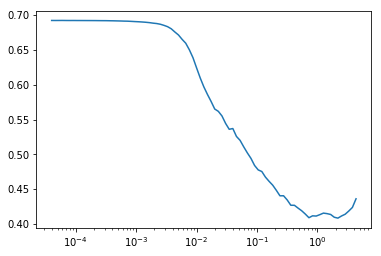

In [ ]:
learn.recorder.plot()

Then, we choose a value that is an order of magnitude before the mimum: the minimum value is on the edge diverging so it is too high. An order of magnitude before, a value that's still aggressive (for quicker training) but still safer from exploding. (In this example case 1e-1 is a good choice).

Let's start training with this optimal value:

In [ ]:
simple_learner().fit_one_cycle(2, 1e-1)

Total time: 00:08
epoch  train loss  valid loss
0      0.100398    0.042191    (00:04)
1      0.031502    0.024299    (00:04)



Picking the minimum isn't a good idea because training will diverge.

In [ ]:
simple_learner().fit_one_cycle(2, 1e-0)

Total time: 00:08
epoch  train loss  valid loss
0      0.586829    0.693146    (00:04)
1      0.691079    0.693146    (00:04)



Picking a value to far below the minimum isn't optimal because training is too slow.

In [ ]:
simple_learner().fit_one_cycle(2, 1e-2)

Total time: 00:08
epoch  train loss  valid loss
0      0.151034    0.130968    (00:04)
1      0.085000    0.073862    (00:04)



In [ ]:
show_doc(LRFinder, doc_string=False)

## <a id=LRFinder></a>`class` `LRFinder`
> `LRFinder`(`learn`:[`Learner`](/basic_train.html#Learner), `start_lr`:`float`=`1e-05`, `end_lr`:`float`=`10`, `num_it`:`int`=`100`) :: [`LearnerCallback`](/basic_train.html#LearnerCallback)
<a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/lr_finder.py#L9">[source]</a>

Creates a [`LRFinder`](/callbacks.lr_finder.html#LRFinder) [`Callback`](/callback.html#Callback) for `learn` to go on a mock training from `start_lr` to `end_lr` for `num_it` iterations. Training is interrupted before the end of `num_it` if the losses diverge too early.

## Undocumented Methods - Methods moved below this line will intentionally be hidden

In [ ]:
show_doc(LRFinder.on_train_end)

In [ ]:
show_doc(LRFinder.on_batch_end)

In [ ]:
show_doc(LRFinder.on_train_begin)

In [ ]:
show_doc(LRFinder.on_epoch_end)